# Data Exploration, Feature Engineering, and Statistics for Data Scientists

# Horses For Courses: Daily horse racing (thoroughbred) data, machine learning for fun and profit

We'll be exploring the Horses for courses dataset from Kaggle.

https://www.kaggle.com/lukebyrne/horses-for-courses

1. Where you are going to get your data from - yes, it can be standard sets. - kaggle dataset
2. What you are going to do with your data. - The purpose of the analysis explore various questions about horse runners and racing.  We explore relationships between position and horse number, and various other factors.
3. Why is the project interesting. - gambling on horses is exilirating, and filled with data.  Perhaps we can find relationships between a runner's position and other variables such as handicap weight for example.  You could also apply advanced data science techniques to make predictions on a horse's position.

In [137]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [138]:
# Next, load the csv file into a DataFrame and look at the first few lines.¶
runners = pd.read_csv('runners.csv')
odds = pd.read_csv('odds.csv')
horses = pd.read_csv('horses.csv')
runners.head()

,id,collected_at,market_id,position,place_paid,margin,horse_id,trainer_id,rider_id,handicap_weight,...,tip_five_win,tip_five_place,tip_six_win,tip_six_place,tip_seven_win,tip_seven_place,tip_eight_win,tip_eight_place,tip_nine_win,tip_nine_place
0,4,2016-06-27 02:54:31.800293,1,NaN,1,NaN,4,4.0,4.0,58.5,...,t,t,f,t,f,t,f,t,t,t
1,2,2016-06-27 02:54:31.765863,1,NaN,1,NaN,2,2.0,2.0,58.5,...,f,t,f,t,t,t,f,t,f,t
2,5,2016-06-27 02:54:31.835329,1,NaN,0,NaN,5,5.0,5.0,56.5,...,f,t,f,f,f,f,f,f,f,f
3,10,2016-06-27 02:54:31.974395,1,NaN,0,NaN,10,4.0,10.0,56.5,...,f,f,f,f,f,f,f,f,f,f
4,6,2016-06-27 02:54:31.873492,1,NaN,0,NaN,6,6.0,6.0,56.5,...,f,f,f,f,f,f,f,f,f,f


In [139]:
odds.head()

,runner_id,collected_at,odds_one_win,odds_one_win_wagered,odds_one_place,odds_one_place_wagered,odds_two_win,odds_two_win_wagered,odds_two_place,odds_two_place_wagered,odds_three_win,odds_three_win_wagered,odds_three_place,odds_three_place_wagered,odds_four_win,odds_four_win_wagered,odds_four_place,odds_four_place_wagered
0,1,2016-06-27 02:55:06.078299,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-06-27 02:56:05.675422,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2016-06-27 02:57:06.76054,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2016-06-27 02:58:05.875479,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2016-06-27 02:59:05.570912,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here are some variable descriptions from the Kaggle website:


runners.csv

id
collected

    what time was this row created/data collected, datetime in UTC

market_id
position

    THIS IS THE FIELD WE WANT TO PREDICT!!!!
    Will either be 1,2,3,4,5,6 etc or 0/null if the horse was scratched or failed to finish
    If all positions for a market_id are null it means we were unable to match up the positional data for this market

place_paid

    Will either be 1/0 or null
    If you see a race that only has 2 booleans of 1 it means that the race only paid out places on the first two positions

margin

    If the runner didnt win, how many lengths behind the 1st place was it

horse_id

    see horses.csv

trainer_id
rider_id

    see riders.csv

handicap_weight
number
barrier
blinkers
emergency

    did it come into the race at the last minute

form_rating_one
form_rating_two
form_rating_three
last_five_starts
favourite_odds_win

    from one of the odds sources, will it win - true/false

favourite_odds_place

    from one of the odds sources, will it win - true/false

favourite_pool_win
favourite_pool_place
tip_one_win

    from a tipster, will it win - true/false

tip_one_place

    from a tipster, will it place - true/false

tip_two_win
tip_two_place
tip_three_win
tip_three_place
tip_four_win
tip_four_place
tip_five_win
tip_five_place
tip_six_win
tip_six_place
tip_seven_win
tip_seven_place
tip_eight_win
tip_eight_place
tip_nine_win

tip_nine_place


We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [140]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in runners.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

runners.columns = new_names

print(runners.columns)

Index(['id', 'collected_at', 'market_id', 'position', 'place_paid', 'margin',
       'horse_id', 'trainer_id', 'rider_id', 'handicap_weight', 'number',
       'barrier', 'blinkers', 'emergency', 'form_rating_one',
       'form_rating_two', 'form_rating_three', 'last_five_starts',
       'favourite_odds_win', 'favourite_odds_place', 'favourite_pool_win',
       'favourite_pool_place', 'tip_one_win', 'tip_one_place', 'tip_two_win',
       'tip_two_place', 'tip_three_win', 'tip_three_place', 'tip_four_win',
       'tip_four_place', 'tip_five_win', 'tip_five_place', 'tip_six_win',
       'tip_six_place', 'tip_seven_win', 'tip_seven_place', 'tip_eight_win',
       'tip_eight_place', 'tip_nine_win', 'tip_nine_place'],
      dtype='object')


Let's also convert blinkers to a binary column, where 1 represents True and 0 represents False.

In [141]:
runners['blinkers'] = runners['blinkers'].apply(lambda x: 1 if x == True else 0)
runners['blinkers'].head()

0    0
1    0
2    0
3    0
4    0
Name: blinkers, dtype: int64

Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [142]:
# Create runners table in horses database (only run this once!)
engine = create_engine('sqlite:///horses.db')
conn = engine.connect()

conn.execute("DROP TABLE IF EXISTS runners")
conn.execute("DROP TABLE IF EXISTS odds")
conn.execute("DROP TABLE IF EXISTS horses")

runners.to_sql('runners', conn)
odds.to_sql('odds', conn)
horses.to_sql('horses', conn)

In [143]:
%load_ext sql
%sql sqlite:///horses.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: None@horses.db'

In [144]:
%%sql
SELECT name FROM sqlite_master WHERE type = "table"

Done.


name
runners
odds
horses


In [145]:
# %%sql
# DROP TABLE horses

SQL: 1) Which horse had the highest odds_one_win_wagered? - 42864

2 ) Did that horse win? - yes, since position is 1

In [146]:
%%sql
select max(odds.odds_one_win_wagered), runners.id from runners
inner join odds on runners.id = odds.runner_id

Done.


odds_one_win_wagered),id
545799.66,42864


In [147]:
%%sql
select max(odds.odds_one_win_wagered), runners.id, runners.position from runners
inner join odds on runners.id = odds.runner_id

Done.


odds_one_win_wagered),id,position
545799.66,42864,1.0


Which horse won despite the lowest odds? - 9532

In [148]:
%%sql
select min(odds.odds_one_win_wagered), runners.id, runners.position from runners
inner join odds on runners.id = odds.runner_id
where
position = 1 and
odds.odds_one_win_wagered > 0

Done.


odds_one_win_wagered),id,position
0.01,9532,1.0


Of the horses that won, which had the heaviest handicap weight?

In [149]:
%%sql
select * from runners
where position = 1
order by handicap_weight desc
limit 1

Done.


index,id,collected_at,market_id,position,place_paid,margin,horse_id,trainer_id,rider_id,handicap_weight,number,barrier,blinkers,emergency,form_rating_one,form_rating_two,form_rating_three,last_five_starts,favourite_odds_win,favourite_odds_place,favourite_pool_win,favourite_pool_place,tip_one_win,tip_one_place,tip_two_win,tip_two_place,tip_three_win,tip_three_place,tip_four_win,tip_four_place,tip_five_win,tip_five_place,tip_six_win,tip_six_place,tip_seven_win,tip_seven_place,tip_eight_win,tip_eight_place,tip_nine_win,tip_nine_place
6997,6885,2016-07-10 01:30:14.868873,567,1.0,1,0.0,5953,70.0,436.0,71.0,1,7,0,f,100.0,100.0,21.0,45212,f,f,t,t,f,None,t,t,t,t,t,t,f,t,t,t,f,t,f,t,t,t


EDA:
        Calculate the percent of winning horses that had blinkers.
        
        Make at least one barplot of a categorical variable
        Make at least one boxplot of continuous variables
        "Make at least one boxplot of a continuous variable grouped by a categorical variable”. In other words, for your second boxplot, only one continuous variable need be plotted (against another variable which should be categorical.)

In [150]:
%%sql
select count(distinct(id)) from runners
where position = 1 and
blinkers = 1

Done.


count(distinct(id))
0


In [151]:
%%sql
select count(distinct(id)) from runners
where position = 1 and
blinkers = 0

Done.


count(distinct(id))
3196


None of the winning horses had blinkers, so the percentage of winning horses that had blinkers = 0.

In [152]:
# loads the data from the horses table into a Pandas DataFrame
horses_table = %sql SELECT * FROM runners;
horses = horses_table.DataFrame()

Done.


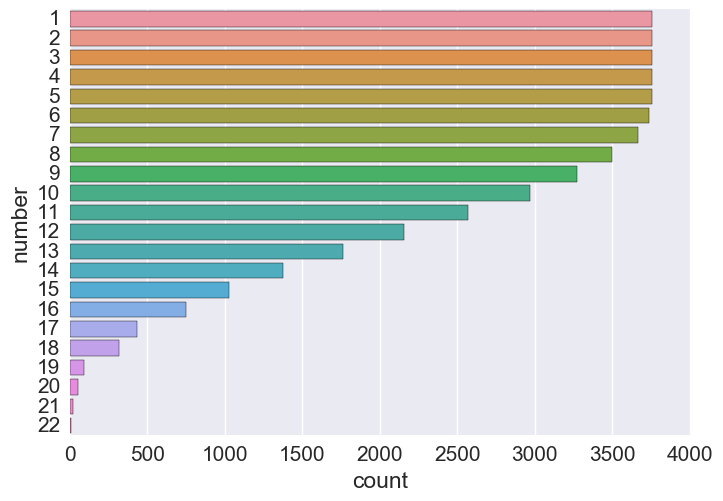

In [153]:
# Make at least one barplot of a categorical variable
sns.countplot(y='number', data=horses);

# the racehorse number is considered categorical because it is more like an id number than a ranking.
# While they can be ordered, the spectrum is arbitrarily assigned.

From the barplot, we can tell that the highest horse number was 22.

The higher numbers had fewer horses becuase not too many races include higher numbers of horses.

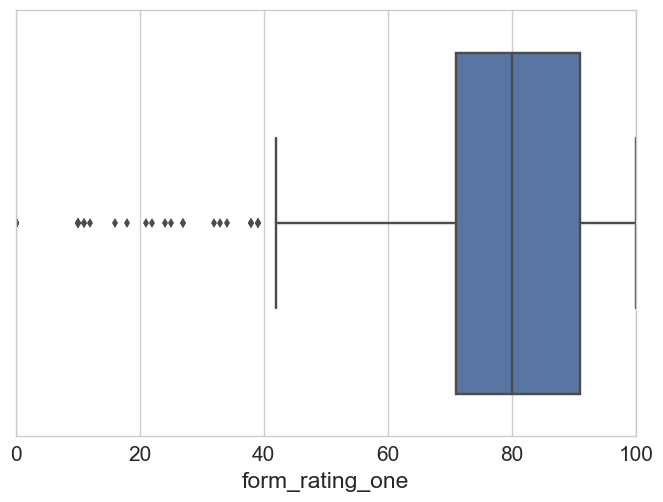

In [154]:
# Make at least one boxplot of continuous variables
sns.set_style("whitegrid")
ax = sns.boxplot(x=runners["form_rating_one"])

barplot of form_rating_one

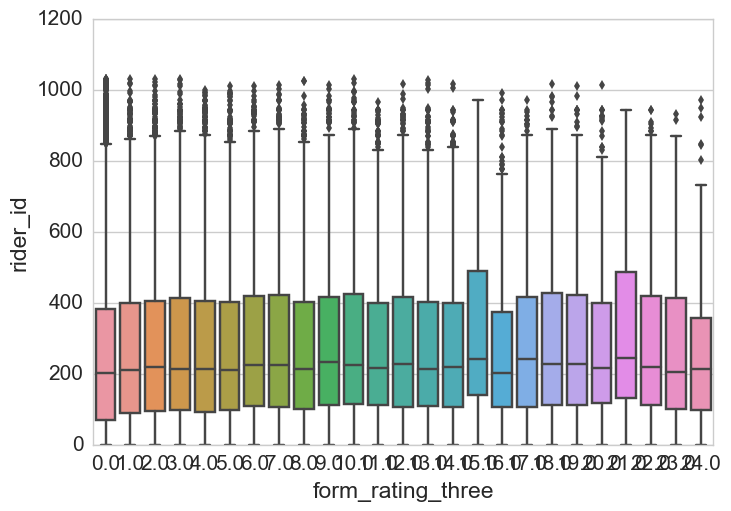

In [155]:
#  "Make at least one boxplot of a continuous variable grouped by a categorical variable”. In other words, for your second boxplot, only one continuous variable need be plotted (against another variable which should be categorical.)

sns.boxplot(runners.form_rating_three, runners.rider_id)

form_rating_three vs rider_id

In [156]:
# EDA/Statistics:
#         Calculate the mean and standard deviation of the margin column for each position.
#         Calculate the mean and standard deviation of at least one other continuous variable
#     -- The other calculation will measure mean and standard deviation of the handicap_weight for each position

all_positions = runners.position.unique()

for x in all_positions:
    print(x)

nan
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
0.0
13.0
14.0
15.0
16.0
17.0
18.0


In [157]:
runners.groupby(['position'])['margin'].mean()

position
0.0      0.000000
1.0      0.000000
2.0      1.309778
3.0      2.551362
4.0      3.654819
5.0      4.777588
6.0      5.877706
7.0      6.985476
8.0      8.191759
9.0      9.559037
10.0    11.001199
11.0    11.938331
12.0    13.350000
13.0    14.436417
14.0    15.822924
15.0    13.713889
16.0    16.600000
17.0    12.000000
18.0    14.400000
Name: margin, dtype: float64

In [158]:
runners.groupby(['position'])['margin'].std()

position
0.0      0.000000
1.0      0.000000
2.0      1.456329
3.0      2.253652
4.0      3.170416
5.0      4.167433
6.0      4.201163
7.0      4.683573
8.0      5.324990
9.0      6.410573
10.0     8.329768
11.0     7.871544
12.0     8.067190
13.0    11.279915
14.0    10.491220
15.0     8.160042
16.0    10.959153
17.0     0.565685
18.0          NaN
Name: margin, dtype: float64

In [159]:
runners.groupby(['position'])['handicap_weight'].mean()

position
0.0     61.788889
1.0     57.265019
2.0     57.168229
3.0     57.119950
4.0     56.962610
5.0     56.934501
6.0     56.794089
7.0     56.664286
8.0     56.653363
9.0     56.586360
10.0    56.518499
11.0    56.560467
12.0    56.721708
13.0    56.499016
14.0    56.388704
15.0    56.631944
16.0    56.161765
17.0    56.000000
18.0    55.000000
Name: handicap_weight, dtype: float64

In [160]:
runners.groupby(['position'])['handicap_weight'].std()

position
0.0     5.410133
1.0     2.247205
2.0     2.276830
3.0     2.310456
4.0     2.215028
5.0     2.234773
6.0     2.189710
7.0     2.135281
8.0     2.112664
9.0     2.083552
10.0    2.043976
11.0    2.042122
12.0    2.067470
13.0    1.932158
14.0    1.960886
15.0    2.340689
16.0    1.841115
17.0    1.414214
18.0         NaN
Name: handicap_weight, dtype: float64

Statistics/Random Sampling - For the following questions, draw a sample of 100: Compare sample statistics & population statistics for handicap_weight. Make histograms of the handicap_weight sample & handicap_weight population.

    Compare sample statistics & population statistics for at least one other continuous variable.

    For the last problem of Statistics/Random Sampling, make histograms of sample & population for a continuous variable of your choice.

    Make histograms of the form_rating_two sample & at least one other continuous variable in the population.


In [161]:
sample_100 = runners.sample(n=100)
print("sample: \n", sample_100.describe()['handicap_weight'], "\n")
print("population: \n", runners.describe()['handicap_weight'])

sample: 
 count    100.000000
mean      56.800000
std        2.649566
min       54.000000
25%       54.875000
50%       56.500000
75%       58.000000
max       68.500000
Name: handicap_weight, dtype: float64 

population: 
 count    46483.000000
mean        56.845427
std          2.211655
min         50.500000
25%         55.000000
50%         57.000000
75%         58.500000
max         72.500000
Name: handicap_weight, dtype: float64


/Users/justin/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


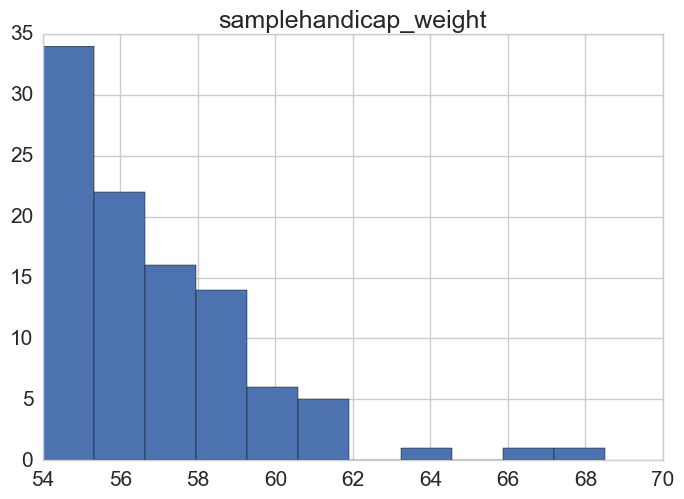

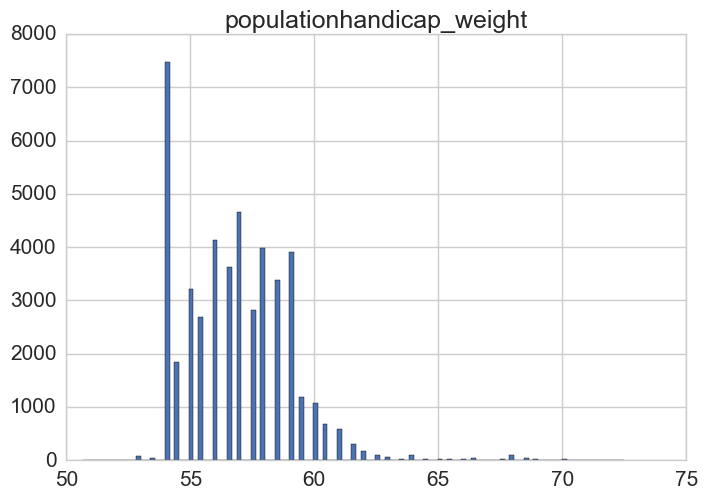

In [162]:
plt.hist(sample_100["handicap_weight"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("samplehandicap_weight")
plt.show()

plt.hist(runners["handicap_weight"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("populationhandicap_weight")
plt.show()

comment on comparison of sample vs population

the sample handicap_weight and population handicap_weight had very similar statistics, and are almost identical.  We see the biggest difference in max and min values, as expected, since it is highly unlikely to sample the maximum or minimum outlier in an entire population.

In [163]:
sample_100 = runners.sample(n=100)
print("sample: \n", sample_100.describe()['form_rating_three'], "\n")
print("population: \n", runners.describe()['form_rating_three'])

sample: 
 count    100.000000
mean       4.660000
std        5.518051
min        0.000000
25%        0.000000
50%        2.000000
75%        8.250000
max       19.000000
Name: form_rating_three, dtype: float64 

population: 
 count    46413.000000
mean         4.842307
std          5.905445
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max         24.000000
Name: form_rating_three, dtype: float64


/Users/justin/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


The population form_rating_three contained values that did not make sense to compute quartile percentages.

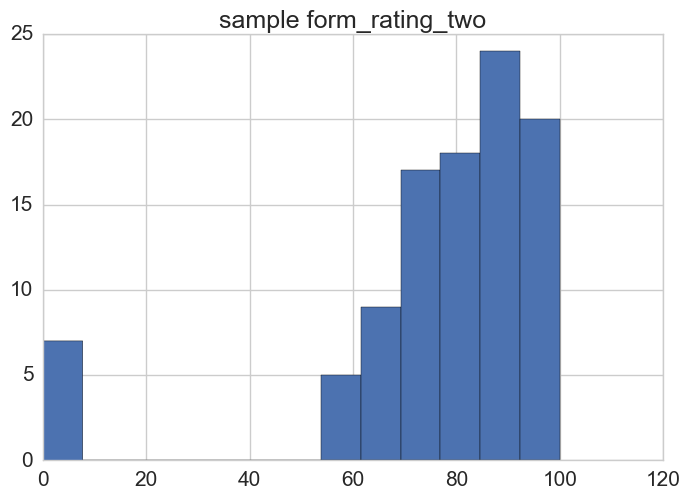

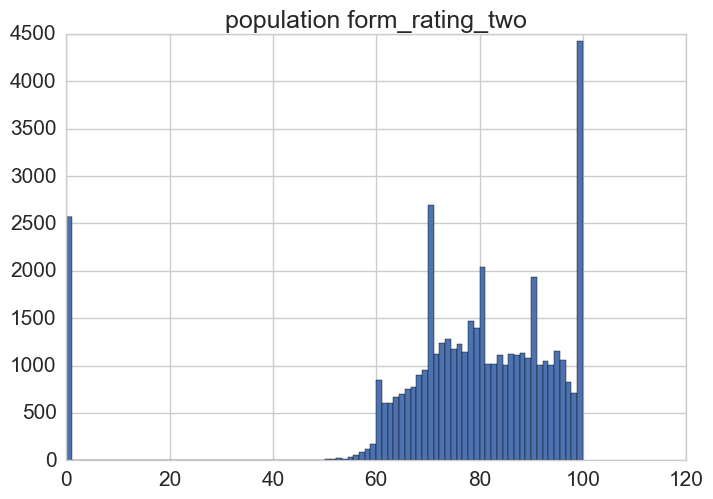

In [164]:
plt.hist(sample_100["form_rating_two"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("sample form_rating_two")
plt.show()

plt.hist(runners["form_rating_two"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("population form_rating_two")
plt.show()

comment on comparison of sample vs population

the sample form_rating_two and population form_rating_two had very similar statistics, and are almost identical.  We see the biggest difference in max and min values, as expected, since it is highly unlikely to sample the maximum or minimum outlier in an entire population.

    Probability: You pick 1 horse at random to wager a winning bet.
        What's the probability that the horse wins? (probability of a horse with position = 1)
        
        One more scenario:
        You pick 1 horse at random to wager a show (3rd place or better).
           What's the probability that the horse shows? (probability of a horse with position = 1, 2, or 3)

In [165]:
%%sql
select count(*) from runners

Done.


count(*)
46483


In [166]:
%%sql
select count(*) from runners
where
position = 1

Done.


count(*)
3196


In [167]:
%%sql
select count(*) from runners
where
position IN (1, 2, 3)

Done.


count(*)
9590


In [168]:
from scipy.special import comb

p_1_win = comb(3196, 1)/comb(46483, 1)
print('{:.7f}'.format(p_1_win))

p_1_show = comb(9590,1)/comb(46483, 1)
print(p_1_show)

0.0687563
0.206311985027


    Probability: You pick 1 horse at random to wager a winning bet.
        What's the probability that the horse wins? (probability of a horse with position = 1)
        
        
        0.0687563
        
        One more scenario:
        You pick 1 horse at random to wager a show (3rd place or better).
           What's the probability that the horse shows? (probability of a horse with position = 1, 2, or 3)
            
            0.206

#6. Identify and Manipulate Random Variables / Distributions


Let's analyze the odds_one_win data.

Let's plot a normal distribution.

Let's fabricate an example of a geometric distribution from this data.  

In [169]:
%%sql
select count(distinct(id)) from runners

Done.


count(distinct(id))
46483


In [170]:
%%sql
select count(distinct(id)) from runners
where emergency = 't'

Done.


count(distinct(id))
3771


Suppose you pick horses at random.  What is the probability that you pick an emergency horse at the 3rd draw?

Let X be the number of draws before picking an emergency horse.
Then X ~ geometric with p = 3771/46483

Hence we want to calcualte P(X = 3).

In [171]:
import scipy

scipy.stats.geom.pmf(3,3771/46483,loc=0)

0.068497370426855442

In [172]:
((1 - 3771/46483) ** 2) * 3771/46483

0.06849737042685543

Hence, the probabilty of getting the 1st emergency horse on the 3rd pick is 0.0684.

In [173]:
print("runners handicap_weight: \n", runners.describe()['handicap_weight'])

runners handicap_weight: 
 count    46483.000000
mean        56.845427
std          2.211655
min         50.500000
25%         55.000000
50%         57.000000
75%         58.500000
max         72.500000
Name: handicap_weight, dtype: float64


/Users/justin/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


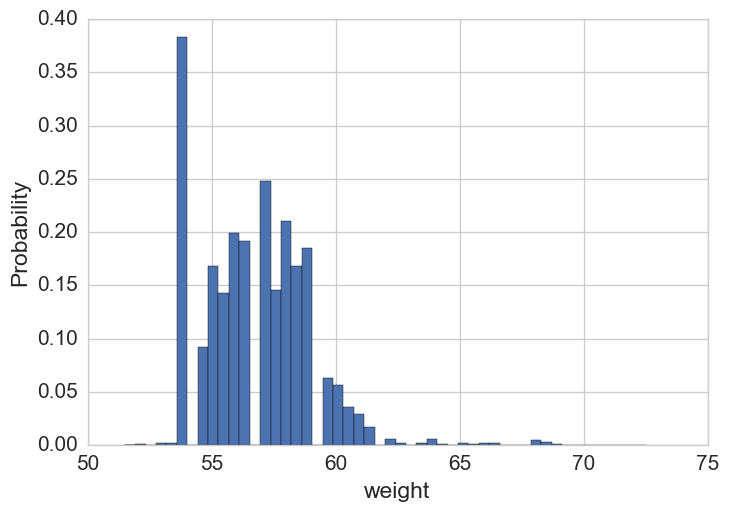

In [174]:
sample_5000 = runners.handicap_weight.sample(n=5000)

# handicap_weight_sample = sample_5000.rvs(5000)
hist(sample_5000, bins=50, normed=True)
xlabel('weight')
ylabel('Probability');

When we took a random sample of 5,000 horses and plotted their handicap_weight.  It looks skewed to the left.

Below depicts what a normal distribution would look like.  It is constructed by taking the mean and standard deviation of the population weight, and constructing a normal distribution.

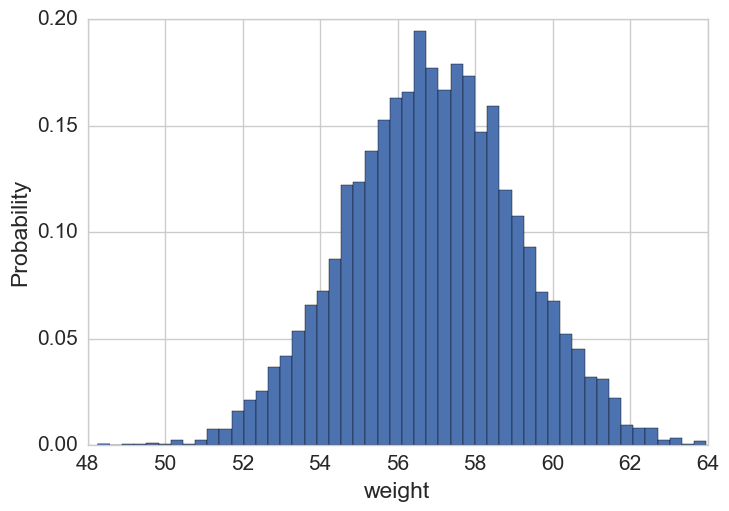

In [175]:
from scipy import stats

weight_normal_dist = stats.norm(56.845427, 2.211655)

handicap_weight_sample = weight_normal_dist.rvs(5000)
hist(handicap_weight_sample, bins=50, normed=True)
xlabel('weight')
ylabel('Probability');

If we try to fit our sample results to a normal distibution, you can see that it does not fit well.

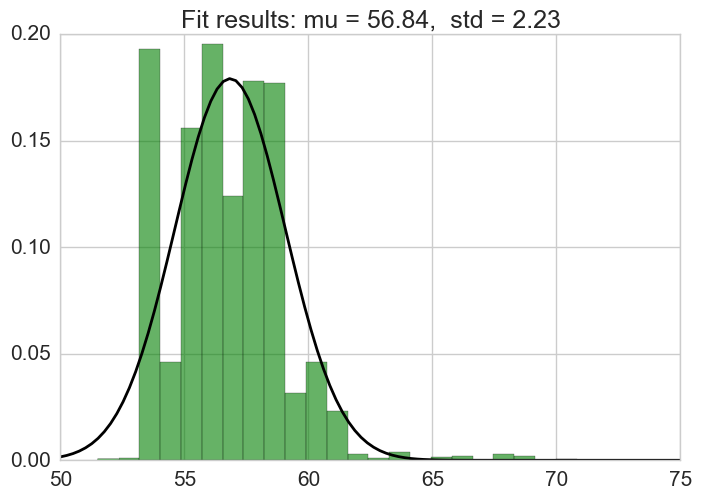

In [176]:
# http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = sample_5000

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Making Statistical Inferences from Sample to Population

Hypothesis Testing

A famous horse racing aficionado claims that the average prize money for a racehorse in 2016 is $60,000.  You meet a professional Thoroughbred breeder who thinks that the mean prize money is less than that.  You and I decide to test this hypothesis.

Consider our entire dataset as a sample for the whole population and find the sample mean and standard deviation.

In [177]:
%%sql
select count(*), round(avg(prize_money),2) from horses

Done.


count(*),"round(avg(prize_money),2)"
14621,57166.23


In [178]:
# load the data from the horses table into a Pandas DataFrame
horses_table = %sql SELECT * FROM horses;
all_horses = horses_table.DataFrame()

Done.


In [179]:
all_horses.prize_money.std()

145871.30747503042

First, we state the null and alternative hypothesis:

$$ H_0: \mu = \$60,000 $$
$$ H_a: \mu < \$60,000 $$

We will use a significance value of $$ \alpha = 0.05$$

Next, we calculate the test statistic and p-value:

$$t_{stat} = \frac{\bar{x} - \mu_0}{s/ \sqrt{n}} = \frac{57,166 - 60,000}{145871/ \sqrt{14621}} = -2.35$$

$$\text{p-value} = P(t < -2.35) = .009 < 0.05 $$

In [180]:
t_statistic = (57166-60000)/(145871/sqrt(14621))

p_value = stats.t(145870).cdf(-2.35)
p_value

0.0093873680188032542

Since the p-value is less than 0.05, we reject the null hypothesis. At the 5% level of significance, we found sufficient evidence to conclude that the average prize money is less than $60,000.

# Two Sample Hypothesis Testing

Here we will use hypothesis testing to analyze whether there is a statistically significant difference between the mean prize money for geldings versus all other horse sexes.

id name
1 Gelding
2 Filly
3 Mare
4 Colt
5 Unknown
6 Horse

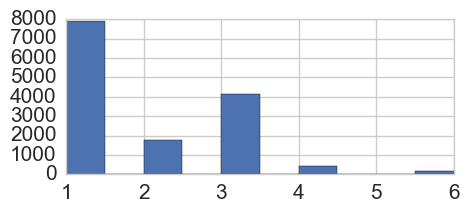

In [181]:
all_horses.sex_id.hist(figsize=(5,2));

In [182]:
geldings = all_horses[all_horses['sex_id']==1]
other_horse_sexes = all_horses[all_horses['sex_id']>1]

Using a Welch's t-test, we determine whether the mean prize_money between geldings and other horse sexes is statistically different.

The Welch's t-test assumes the two populations in which the samples are drawn from have different variances.

We state our null and alternative hypotheses:

$H_0: \mu_1 = \mu_2$  

$H_a: \mu_1 > \mu_2$

In [183]:
stats.ttest_ind(geldings.prize_money, other_horse_sexes.prize_money, equal_var=False)

Ttest_indResult(statistic=9.3619398883337119, pvalue=9.0731357131128176e-21)

The p-value we obtained is less than 0.05 so we can reject the null hypothesis that the mean prize_money between geldings and other horse sexes are the same.

In [184]:
print(geldings.prize_money.mean())
print(other_horse_sexes.prize_money.mean())

# The mean prize money for geldings is much higher than that of other horse sexes.

67583.7523086654
44589.80100794136


# Modeling Quantitative Response Variables with Linear Regression

We run a multiple regression model of $y$ against all the $x$ variables and then produce the residuals and fitted values. Then we create the residual diagnostic plot of residuals on the Y axis against the fitted values on the X axis.

** These exercise models attempt to predict position from runners' margin, which is not representative of real life.

In [197]:
runners = pd.read_csv('runners.csv')
runners = runners[['position', 'place_paid', 'margin', 'handicap_weight', 'form_rating_one', 'form_rating_two', 'form_rating_three', 'favourite_odds_win']]
runners = runners.dropna()
runners['favourite_odds_win'] = runners['favourite_odds_win'].apply(lambda x: 1 if x == True else 0)
runners.head()

,position,place_paid,margin,handicap_weight,form_rating_one,form_rating_two,form_rating_three,favourite_odds_win
195,1.0,1,0.0,57.0,97.0,97.0,11.0,0
196,2.0,1,0.2,60.5,100.0,100.0,21.0,0
197,3.0,0,0.3,55.5,82.0,82.0,3.0,0
198,4.0,0,7.6,56.0,77.0,77.0,0.0,0
199,5.0,0,9.0,59.0,87.0,87.0,18.0,0


# Feature Selection

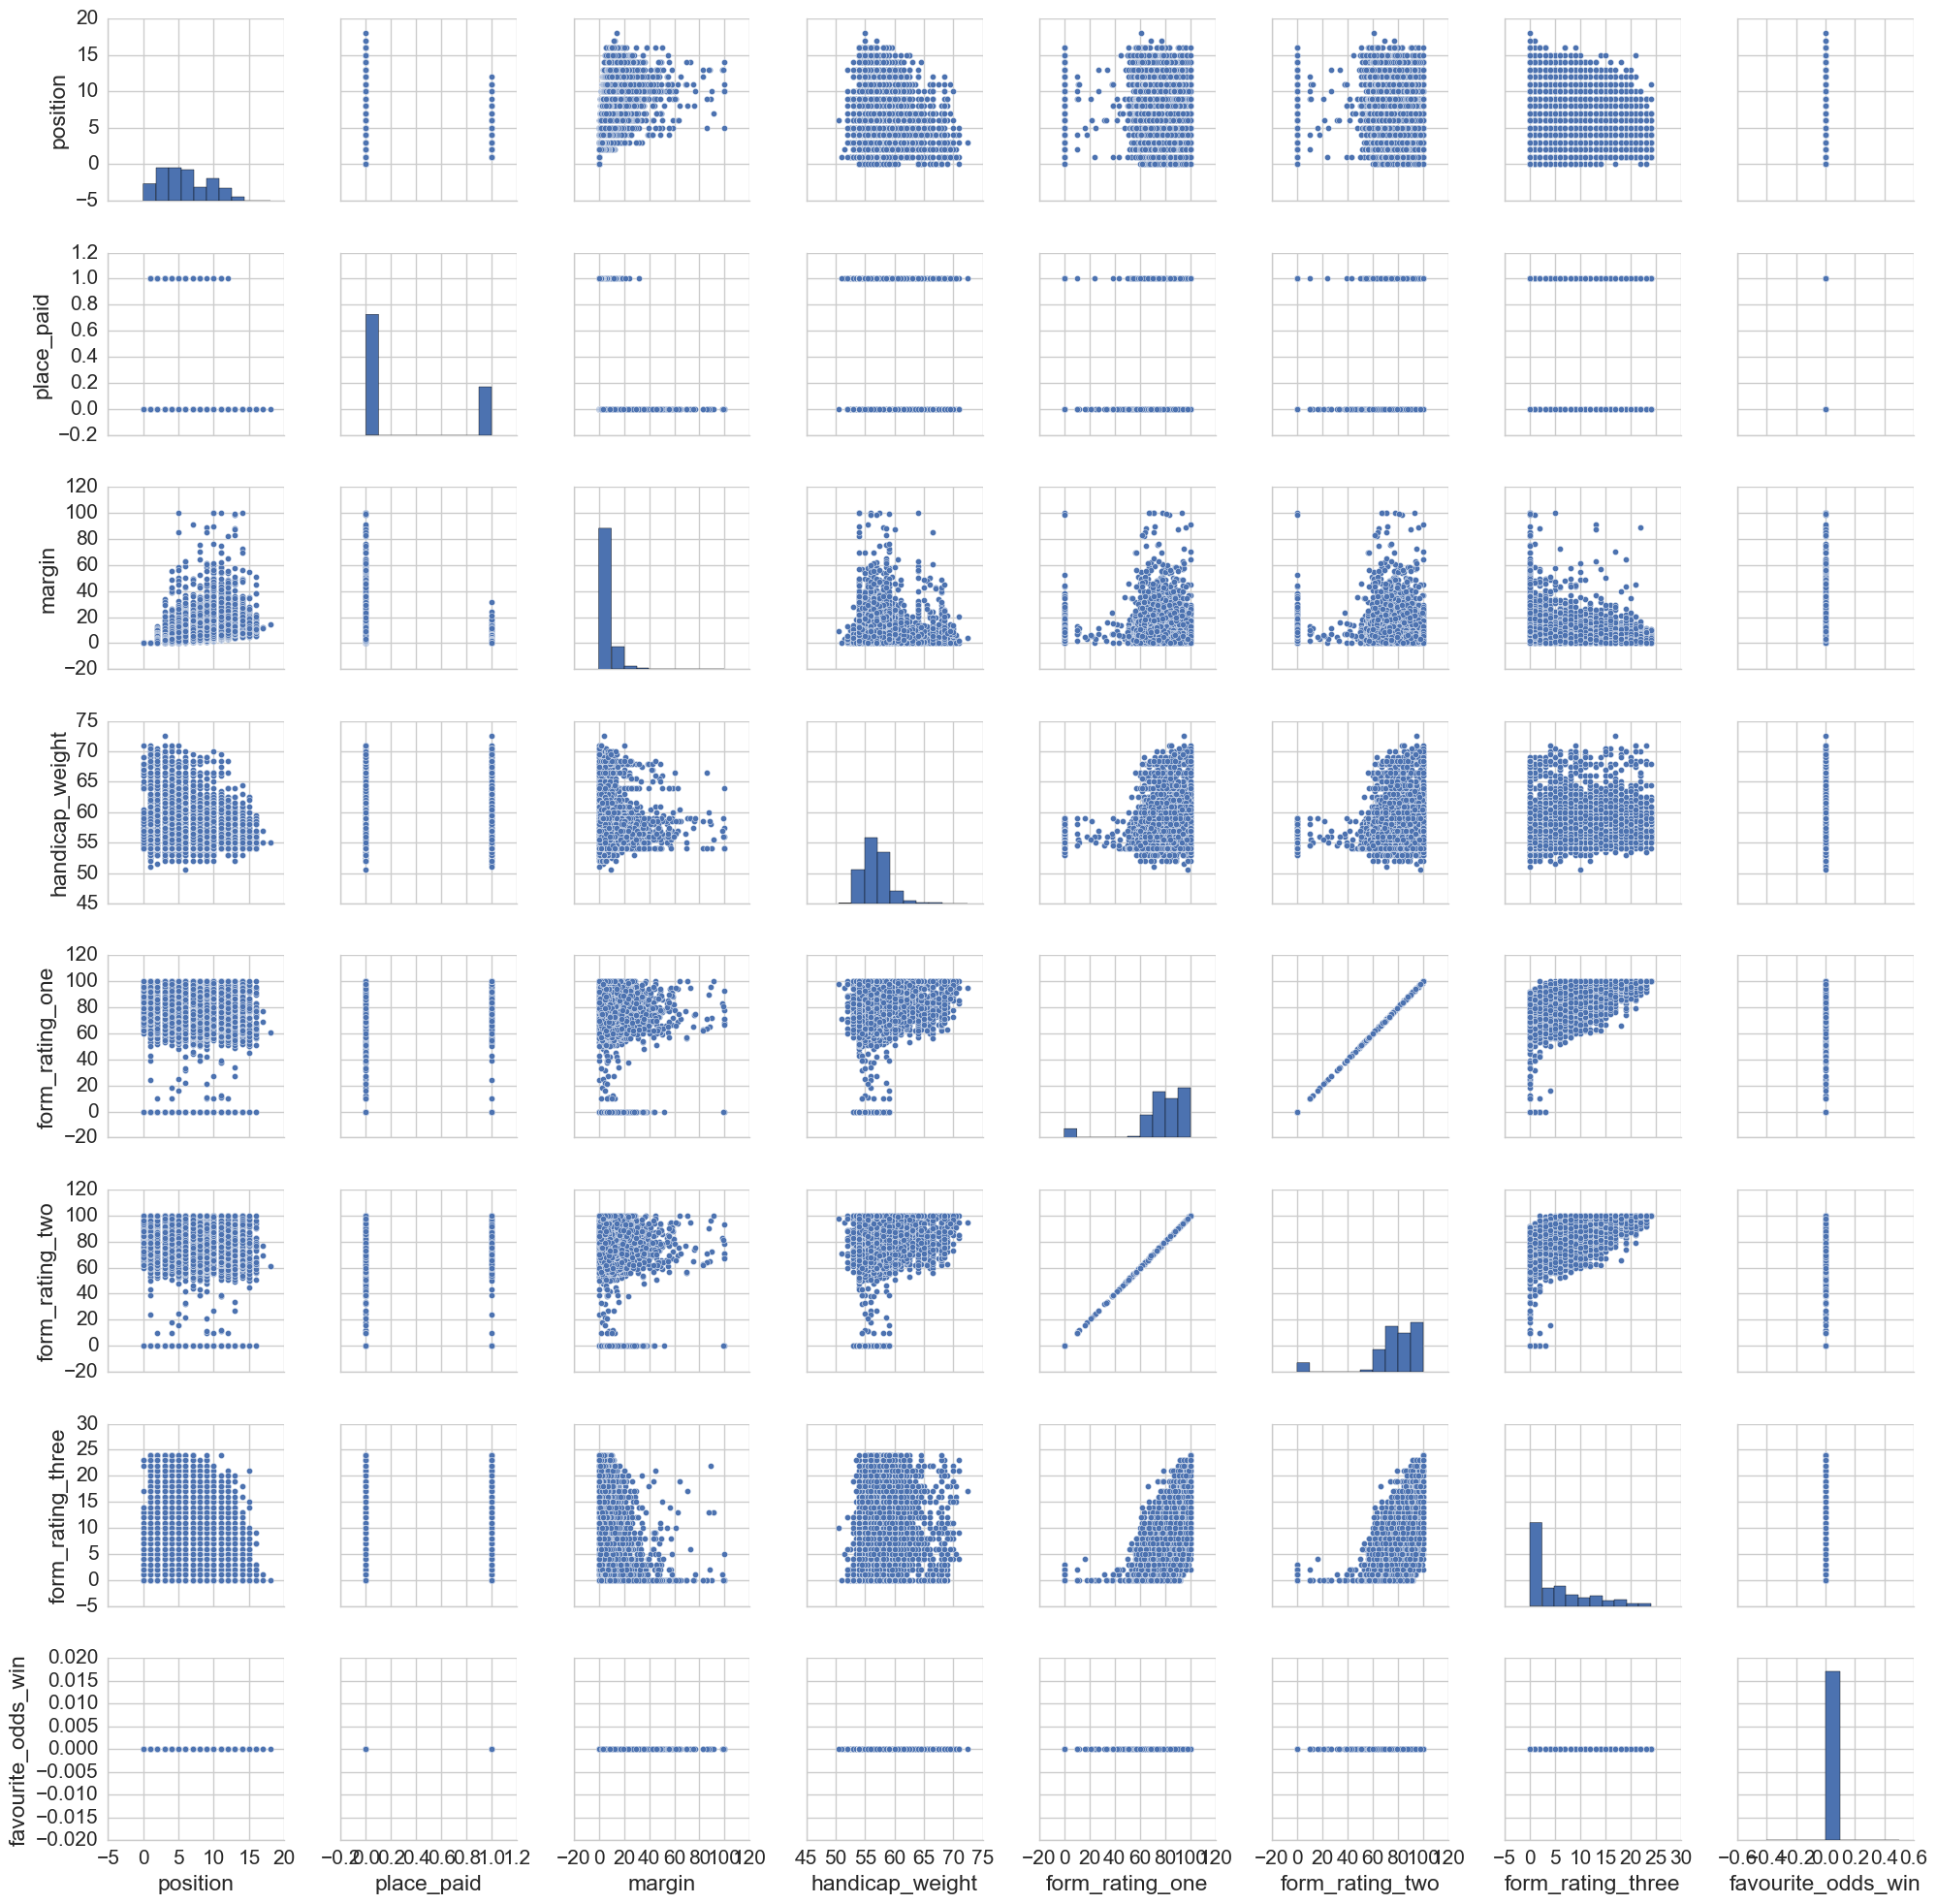

In [206]:
from seaborn import pairplot
pairplot(runners)

/Users/justin/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/justin/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


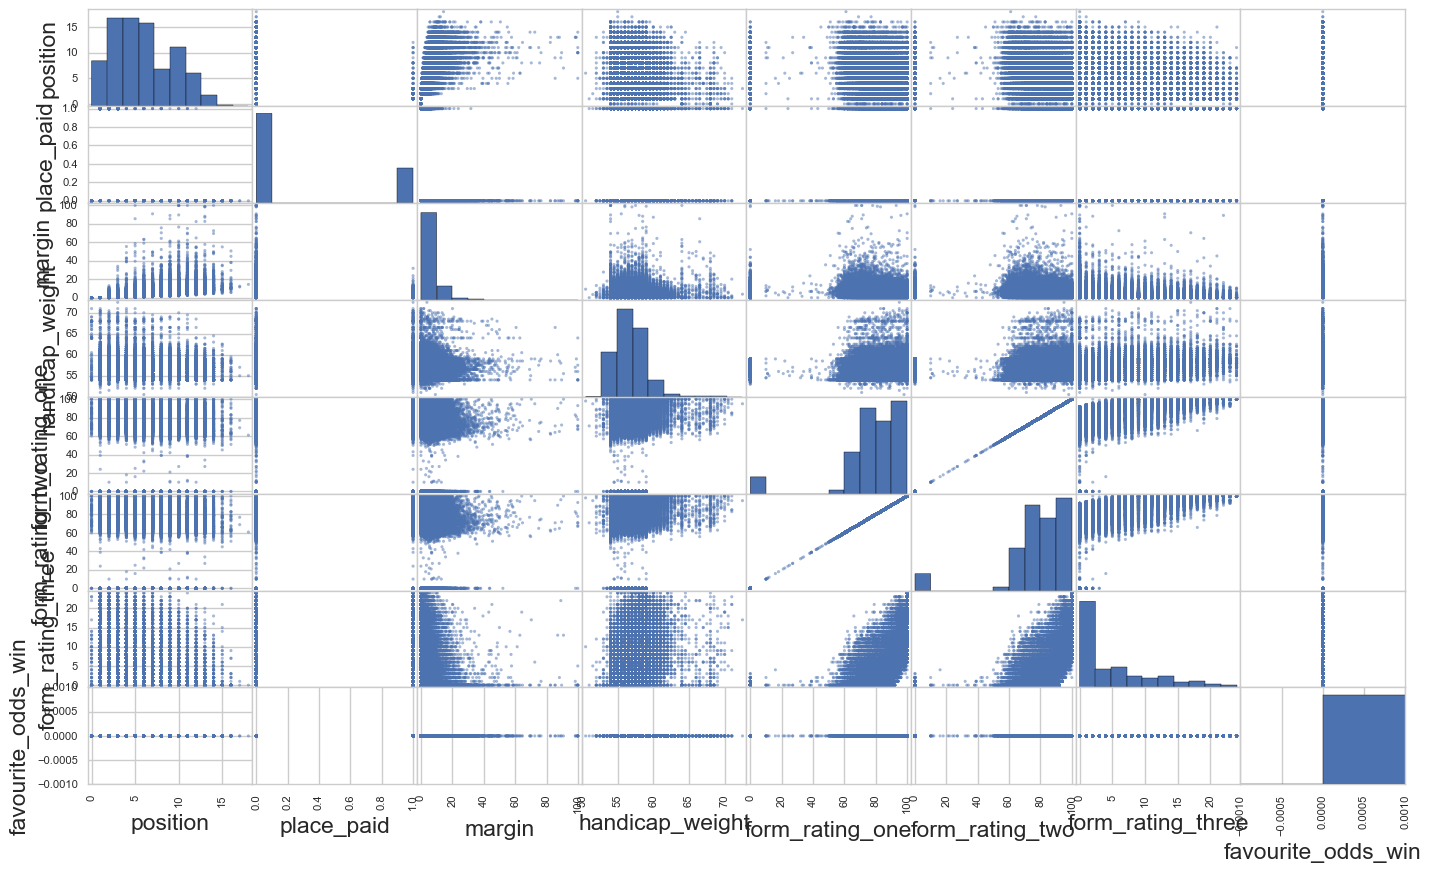

In [208]:
pd.scatter_matrix(runners, figsize=(17, 10), edgecolor='none', alpha=0.5);

>Form rating one and form rating two show a lot of colinnearity, with a strong positive, somewhat linear relationship.  Other variables exhibit less collinearity.

>Position and handicap weight look normally distributed, based on their histograms.

In [198]:
import statsmodels as sm
import statsmodels.api as sms
from statsmodels.formula.api import ols



model1 = ols('position~ place_paid + margin + handicap_weight + form_rating_one + form_rating_two + form_rating_three + favourite_odds_win', data=runners)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               position   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     9736.
Date:                Thu, 20 Oct 2016   Prob (F-statistic):               0.00
Time:                        10:04:42   Log-Likelihood:                -68489.
No. Observations:               32335   AIC:                         1.370e+05
Df Residuals:                   32328   BIC:                         1.371e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.0590      0.304     29.768      0.000       8.463       9.655
place_paid            -3.9284      0.028   -138.494      0.000      -3.984      -3.873
margin                 0.1943      0.002     97.400      0.000       0.190       0.198
handicap_weight       -0.0501      0.005     -9.387      0.000      -0.061      -0.040
form_rating_one     1.587e+09   7.08e+09      0.224      0.823   -1.23e+10    1.55e+10
form_rating_two    -1.587e+09   7.08e+09     -0.224      0.823   -1.55e+10    1.23e+10
form_rating_three     -0.0499      0.002    -20.989      0.000      -0.055      -0.045
favourite_odds_win          0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2264.781   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10415.783
Skew:                           0.175   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Results Discussion

We state our null and alternative hypotheses:

$H_0:$ all the $\beta$s = 0

$H_a:$ at least one $\beta$ nonzero

> The F-statistic was used to calcualte a p value of 0.00, so we reject the null hypothesis that all the weights of the predictors are 0.

When all the continuous variables are 0 our default position is  9.0590.

The coefficients mean that:

For every unit increase in place_paid, position decreases by -3.9284

For every unit increase in handicap_weight position increases by -0.0501, etc.

when all the other variables are kept fixed.

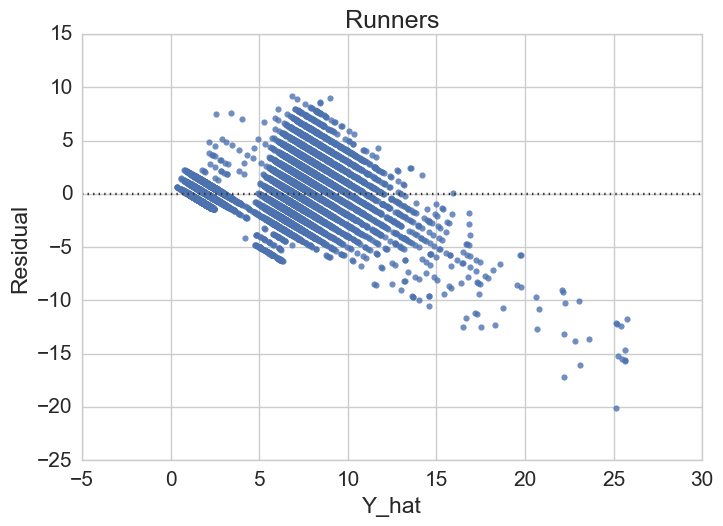

In [201]:
# Test the model with Regression Diagnostics

sns.residplot(results1.fittedvalues, results1.resid)
plt.title('Runners')
plt.ylabel('Residual')
plt.xlabel('Y_hat');

From the plot of residuals, we see that the linearlity assumption is not met because there's an obvious pattern - it's not a cloud of evenly distributed points above and below 0.

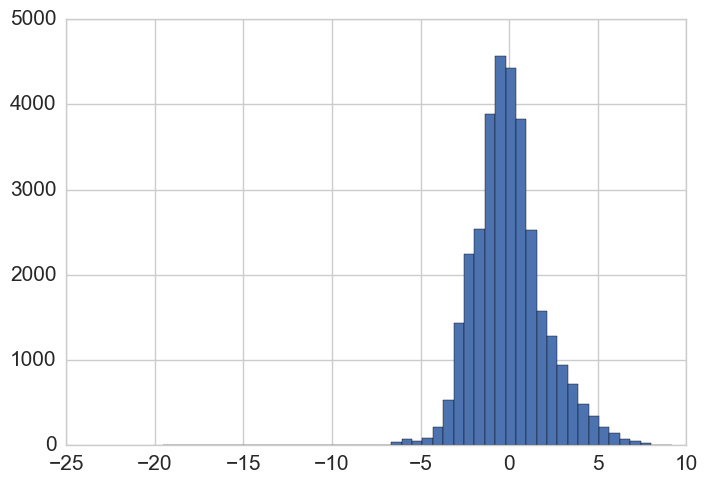

In [202]:
#historgram of residuals
hist(results1.resid, bins = 50);

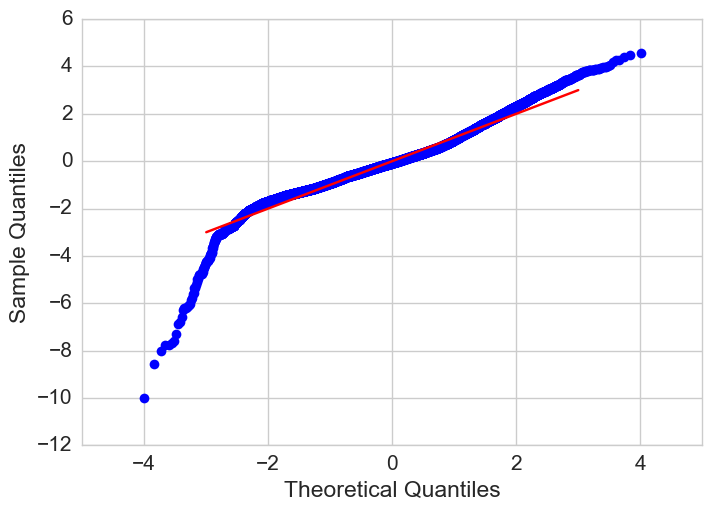

In [203]:
from statsmodels.graphics.gofplots import qqplot

# There are various ways of standardizing the residuals 
# We will use the pearson residuals as the standardized residuals here
sres1 = results1.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

Based on the graphs, the normality assumption is not met. Also, the Prob(JB):  0.00, so we reject the null hypothesis that the residuals are normal.

Hence, model fails normality assumption.

#### Testing for Heteroskedasticity  

There are also numerical tests for heteroskedasticity.  

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [205]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results1.resid, results1.model.exog) # the second output gives the p-value of the test

(6898.7765573654606, 0.0, 1461.3257418073374, 0.0)

based on the results2 test, the p-value is  0.0, so we reject the null hypothesis, and so we have evidence to suggest that there is non-constant variance.

Hence, the model fails the Homoscedasticity assumption.

As a rule of thumb, the fewer variables there are in a model, the easier it is to interpret the model. Use your judgement and remove features which you think are of little practical importance and have coefficients that are statistically insignificant.

To compare the goodness of fit for two different models, a higher adjusted R^2, which is calculated from residuals, is better, and lower AIC and BIC, which are calculated from likelihood, are better.

# Modeling Binary Response Variables with Logistic Regression

### The Logistic Regression Model

The key variable in any regression problem is the **conditional mean** of the outcome variable y given the value of the covariate x:

_Conditional mean_: $E(y|x)$

In linear regression, we assume that this conditional mean is a linear function taking values in $(-\infty, +\infty)$:

$$ E(y|x) = \alpha + \beta x $$

We run a logistic regression on favourite_odds_win, which represents: from one of the odds sources, will it win - true/false.

In [223]:
import statsmodels.formula.api as smf

logit_model1 = smf.logit('place_paid ~ form_rating_one', data = runners).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.579601
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             place_paid   No. Observations:                32335
Model:                          Logit   Df Residuals:                    32333
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Oct 2016   Pseudo R-squ.:                 0.02826
Time:                        11:00:43   Log-Likelihood:                -18741.
converged:                       True   LL-Null:                       -19286.
                                        LLR p-value:                4.468e-239
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8208      0.069    -40.810      0.000      -2.956      -2.685
form_rating_one     0.0237      0.001     28.607      0.000       0.022       0.025
===================================================================================
"""

In [224]:
glm_binom = smf.glm('place_paid ~ form_rating_one', data = runners).fit()
glm_binom.params

Intercept          0.015683
form_rating_one    0.003452
dtype: float64

# Time Series 

In [229]:
runners.head()

,position,place_paid,margin,handicap_weight,form_rating_one,form_rating_two,form_rating_three,favourite_odds_win
195,1.0,1,0.0,57.0,97.0,97.0,11.0,0
196,2.0,1,0.2,60.5,100.0,100.0,21.0,0
197,3.0,0,0.3,55.5,82.0,82.0,3.0,0
198,4.0,0,7.6,56.0,77.0,77.0,0.0,0
199,5.0,0,9.0,59.0,87.0,87.0,18.0,0


Using pandas.date_range() to create a dates variable

In [234]:
runners['dates'] = pd.date_range('January 2016', periods=len(runners), freq='D')

Create a time variable to be used later in the regressions and both a day and year variable (use pd.DatetimeIndex to strip these values from your dates). 

In [237]:
runners['time'] = runners.index + 1

runners['month']=pd.DatetimeIndex(runners['dates']).month
 
runners['year']=pd.DatetimeIndex(runners['dates']).year

Set the dates variable as the index of your dataframe.

In [239]:
runners.index = runners['dates']
runners.head()

,position,place_paid,margin,handicap_weight,form_rating_one,form_rating_two,form_rating_three,favourite_odds_win,dates,time,month,year
dates,,,,,,,,,,,,
2016-01-01,1.0,1,0.0,57.0,97.0,97.0,11.0,0,2016-01-01,196,1,2016
2016-01-02,2.0,1,0.2,60.5,100.0,100.0,21.0,0,2016-01-02,197,1,2016
2016-01-03,3.0,0,0.3,55.5,82.0,82.0,3.0,0,2016-01-03,198,1,2016
2016-01-04,4.0,0,7.6,56.0,77.0,77.0,0.0,0,2016-01-04,199,1,2016
2016-01-05,5.0,0,9.0,59.0,87.0,87.0,18.0,0,2016-01-05,200,1,2016


In [240]:
# Calculate some aggregated statistics by month and year.

runners = runners.groupby("month").agg({'position':np.mean})
runners

,position
month,
1,5.709677
2,5.753779
3,5.787242
4,5.929213
5,5.930047
6,5.840824
7,5.991971
8,5.902126
9,5.822727


# Turn the position into a time series using pd.Series().

In [245]:
result = runners.sort_values(by = ['position'], ascending = False)
result

,position
month,
7,5.991971
5,5.930047
4,5.929213
8,5.902126
6,5.840824
9,5.822727
12,5.806085
10,5.791789
3,5.787242


In [246]:
runners_series = pd.Series(runners['position']).to_frame()
runners_series

,position
month,
1,5.709677
2,5.753779
3,5.787242
4,5.929213
5,5.930047
6,5.840824
7,5.991971
8,5.902126
9,5.822727


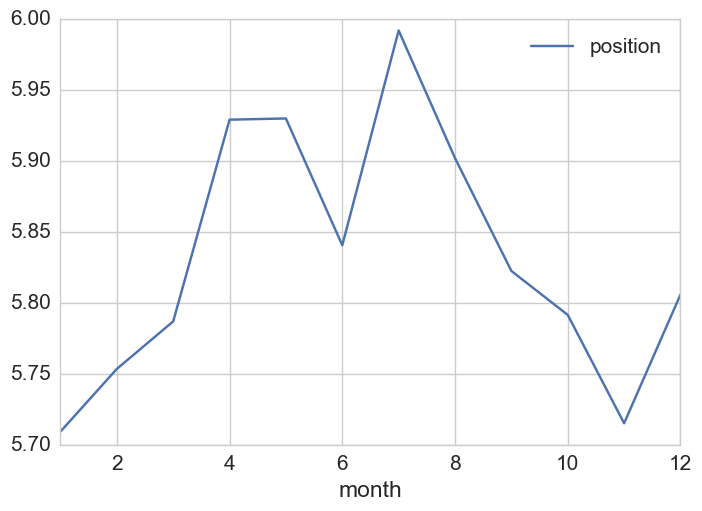

In [247]:
runners_series.plot();

It looks like there is a peak in position in month 7 (July), probably because that is when horseracing is in season, and each race has a higher number of competing horses.